 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 05 : Dynamic Time Warping (DTW)  </b>


We expect you to code the dynamic time warping algorithm from scratch in this programming assignment. The skeleton code is provided for you to understand the algorithm. At the end of the assignment, you need to write an algorithm to perform an isolated digit recognition task using Dynamic Time Warping (DTW) codes. Isolated digit recognition is the task of recognizing the digit from the test speech signal having a single digit in isolation.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<h4> <b> Part (a). Dynamic Time Warping(DTW): </b>  In this part you need to try and implement the basic sequence matching algorithm DTW. </h4>
<dt> <h4> Two sequences A and B can be compared using a euclidean distance
<center> $ A = (x_1, x_2, x_3, ..., x_M)$ </center> <br>
<center> $ B = (y_1, y_2, y_3, ..., y_N)$ </center> <br> </h4> </dt>
<dt> <h4> Now the distance is computed as </h4> </dt>
<center> $ D(A,B) = \frac{1}{N} \sum_1^N || x_n - y_n||$</center> </h4> </dt>
<dt> <h4> There are two main issues </h4> </dt>
<dd> <h4> 1. What if the sequences are not aligned in time ?</h4> </dt>
<dd> <h4> 2. What if the sequences have varying lengths ?</h4> </dt>
<dt> <h4> The non-linear alignment path produces a better similarity measure. </h4> </dt>

![picture](https://drive.google.com/uc?export=view&id=1XWTK0XUpDIuf-5nbe7pk6uPx29-22zF0)

<dt> <h4> <b> Algorithm </b> </h4> </dt>
<dt> <h4>  1. Compute distance matrix $D_{M\times N}$ between A and B </h4> </dt>
<dt> <h4>  2. Compute accumulated distance matrix $C_{M\times N}$ between A and B </h4> </dt>
<dd> <h4>  ~ Initialize: C(0,0) = D(0,0) </h4> </dd>
<dd> <h4>  ~ for i=1,2,..M and j=1,2,...N  <dd> <h4>  ~ Update C <dd> <h4> C(i,j) = D(i,j) + min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> <dd> <h4>  ~ Store the best Path <dd> <h4> P(i,j) = arg min {C(i−1, j−1), C(i, j−1), C(i−1, j)} </h4> </dd> </h4> </dd> </h4> </dd>
<dt> <h4>  3. C(M,N) gives the similarity measure </h4> </dt>
<dt> <h4>  4. Backtrack the best alignment path <br> <center> $ q_T^* = (M,N) \\ q_{t-1}^* = P(q_t^*) \qquad t = T,T-1,....1$ </center></h4> </dt>
<dt> <h4> <b> Programming question </b> </h4> </dt>
<dt> <h4>  1. Consider the following two sequences $A = [4,3,7,0,2,6,5]$, and $B = [3,7,1,6,1,5,4,4]$. Write a DTW algorithm to find the optimal similarity/distance between them. </h4> </dt>
<dd> <h4> - Compute the distance matrix between the two sequences </dd> </h4>
<dd> <h4> - Compute the accumulative distance matrix </dd> </h4>
<dd> <h4> - Backtrack from the accumulative distance matrix to get the optimal path and thereby compute the optimal distance </dd> </h4>
<dd> <h4> - Plot the optimal path on both the distance matrix and cumulative distance matrix to verify the DTW codes </dd> </h4>



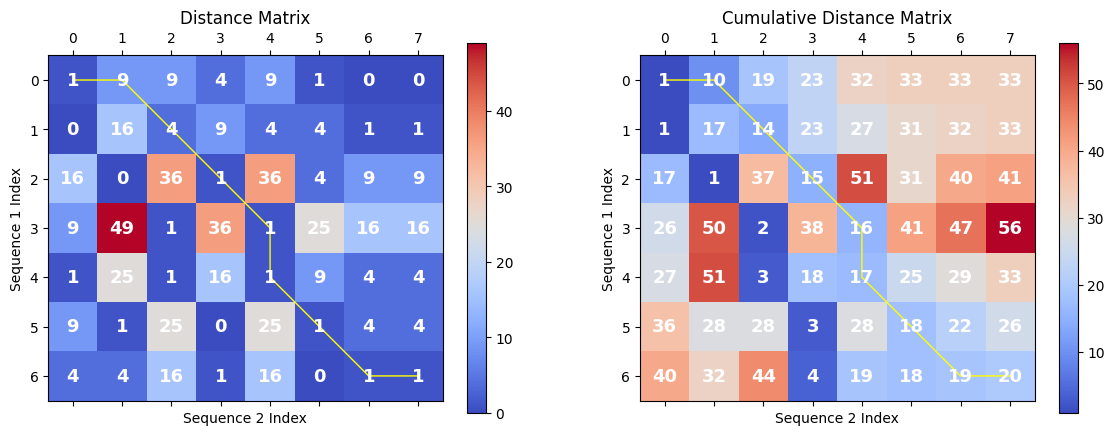

In [1]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two sequences
###########################################################
def DTW(sequence1,sequence2):
    #######################################################
    # Input  : Two sequences
    # Output : DTW path and optimal distance
    #######################################################

    #Initialize the distance matrix
    n , m = len(sequence1),len(sequence2)
    D = np.zeros((n,m))
    
    for i in range(n):
        for j in range(m):
            D[i,j] = (sequence1[i]-sequence2[j])**2     # Compute the euclidean distance between the two points
    
    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix = np.zeros((n,m))    #Cummulative distance matrix

    # Initialize the parent matrix to store the path
    parent = np.zeros((n,m,2))    #Parent matrix to store the path

    DTW_cumulate_Matrix[0,0] = D[0,0]        #Initialize the first element of the cumulative distance matrix

    for i in range(1,n,1):
        DTW_cumulate_Matrix[i,0] = D[i,0] + DTW_cumulate_Matrix[i-1,0]  #Compute the first column of the cumulative distance matrix

    for j in range(1,m,1):
        DTW_cumulate_Matrix[0,j] = D[0,j] + DTW_cumulate_Matrix[0,j-1]  #Compute the first row of the cumulative distance matrix

    #Iterate through the sequence of points in sequences and compute the distance between the sequences.
    for i in range(1,n,1):
        for j in range(1,m,1):
            DTW_cumulate_Matrix[i,j] = D[i,j] + min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1])
            prev = np.argmin([DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]])
            parent[i,j] = [i-1,j] if prev==0 else [i-1,j-1] if prev==1 else [i,j-1]


    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i = n-1 # length of the sequence1
    j = m-1 # length of the sequence2
    opt_path = []
    while i!=0 or j!=0: #Start from the last point and backtrack (last point is bottom right point)
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        
        # Add the current indexes distance
        # print(i,j)
        opt_distance = opt_distance + D[i,j]   #Compute the distance between the points sequence1[i] and sequence2[j]
        opt_path.append([i,j])

        i , j = parent[i,j][0] , parent[i,j][1]
        i,j = (int)(i) , (int)(j)

        #Store the required indexes to obtain the optimal path
    
    opt_path.append([0,0])
    opt_distance = opt_distance + D[0,0]
    # Reverse the path to get the correct order
    opt_path = opt_path[::-1]


    # print(D)

    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################

    return opt_distance, opt_path , D, DTW_cumulate_Matrix

def plotDTWpath(sequence1,sequence2):
    #######################################################
    # Inputs : sequence1 and sequence2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates

    #Obtain the optimal path using "DTW" function
    _ , path , D , DTW_cumulate_Matrix = DTW(sequence1,sequence2)

    #Get the indexes of the optimal path
    path_x = [path[i][0] for i in range(len(path))] 
    path_y = [path[i][1] for i in range(len(path))]

    fig, ax = plt.subplots(1, 2, figsize=(14, 8))

    cax1 = ax[0].matshow(D, cmap='coolwarm')
    fig.colorbar(cax1, ax=ax[0], shrink = 0.6)
    ax[0].plot(path_y, path_x, color="yellow", linewidth=1)  
    for i in range(len(D)):
        for j in range(len(D[0])):
            ax[0].text(j, i, str(int(D[i][j])), ha='center', va='center', color='white', fontsize=13, fontweight='bold')
    ax[0].set_title("Distance Matrix")
    ax[0].set_xlabel("Sequence 2 Index")
    ax[0].set_ylabel("Sequence 1 Index")

    cax2 = ax[1].matshow(DTW_cumulate_Matrix, cmap='coolwarm')
    fig.colorbar(cax2, ax=ax[1], shrink = 0.6)
    ax[1].plot(path_y, path_x, color="yellow", linewidth=1)  
    for i in range(len(DTW_cumulate_Matrix)):
        for j in range(len(DTW_cumulate_Matrix[0])):
            ax[1].text(j, i, str(int(DTW_cumulate_Matrix[i][j])), ha='center', va='center', color='white', fontsize=13, fontweight='bold')
    ax[1].set_title("Cumulative Distance Matrix")
    ax[1].set_xlabel("Sequence 2 Index")
    ax[1].set_ylabel("Sequence 1 Index")

    plt.show()



A=[4,3,7,0,2,6,5]
B=[3,7,1,6,1,5,4,4]
plotDTWpath(A,B)


<b> Report your observations </b>

1.

2.

3.




<dt> <h4> <b> Part (b): </b> In this part of the assignment, we expect you to build the Isolated digit recognition system with the help of the above written DTW algorithm. </dt> </h4>

![picture](https://drive.google.com/uc?export=view&id=1nGtWwbDg8PJBNwck_dUt2mmsCBshrGYc)



<dt> <h4> 1. Record one repetition each of the digits zero, one, two, three, four, five, six, seven, eight, and nine. The modules to record the voice in online mode are provided here. If you are not comfortable using the online recording modules, you can record the digits offline and access them in google colab through proper codes. </dt> </h4>
<dt> <h4> 2. Record three further repetitions of the same digits (Isolated words) as test data. </dt> </h4>  
<dt> <h4> 3. The codes to compute the signal's templates (Mel Frequency Cepstral Coefficients) are provided. Please use them to obtain the templates of the speech signals. </dt> </h4>  
<dt> <h4> 4. Write an algorithm to perform isolated digit recognition with the help of the DTW codes. </dt> </h4>
<dt> <h4> 5. Take two pairs such that one pair is the repetition of the same digit and another one is two different digits. Plot the optimal DTW path on distance and cumulative distance matrices for both cases.   </dt> </h4>
<dt> <h4> 6. Evaluate the digit recognition accuracy, i.e., the percentage of correctly recognized trials out of each digit's total number of attempts. </dt> </h4>
<dt> <h4> 7. Create a confusion matrix and report the most confusing digits. </dt> </h4>


**Module to record the voice in online mode**

In [2]:
from IPython.display import Javascript
# from google.colab import output
from base64 import b64decode
from io import BytesIO
!pip -q install pydub
from pydub import AudioSegment

RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=3):
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  audio = AudioSegment.from_file(BytesIO(b))
  return audio

/home/omdave/.local/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
from matplotlib import pyplot as plt
import numpy as np
import scipy.io.wavfile
import io
import os
from IPython.display import Audio

#### Please comment below line, if you already uploaded the 'recording.wav' in '/content/'
!rm recording.wav

#### You can run this module in the loop to record more repetitions of the digits.
if os.path.isfile('recording.wav'):
    print("wavefile exists, later part of the code uses 'recording.wav' as input speech")
else:
    print("Recording the digits")
    wav = record(3.0) #It will record three seconds of your speech. You can change the duration.
    wav = wav.set_frame_rate(16000)
    sig=wav.get_array_of_samples()
    samples=np.array(sig).T.astype(np.float32)
    fp_arr = np.array(samples).T.astype(np.float32)
    fp_arr /= np.iinfo(sig.typecode).max
    scipy.io.wavfile.write('recording.wav', 16000, fp_arr) #Please change the name.

wn = Audio('recording.wav', autoplay=True)
display(wn)

rm: cannot remove 'recording.wav': No such file or directory
Recording the digits


<IPython.core.display.Javascript object>

NameError: name 'output' is not defined

**Algorithm to perform isolated digit recognition**

In [ ]:
import os

#Open the recording files


In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

###########################################################
#Function to obtain the optimal distance and path between two templates
###########################################################
def vectorDTW(template1,template2):
    #######################################################
    # Input  : Two templates
    # Output : DTW path and optimal distance
    #######################################################


    #######################################################
    # Code snippet to create the cumulative distance matrix
    #######################################################
    # Initialize the cumulative distance matrix
    DTW_cumulate_Matrix =    # cummulative distance matrix
    #Iterate through the sequence of features in templates and compute the distance between the templates.
    for i in range(1,len(template1),1): #you can start from 1
        for j in range(1,len(template2),1):
            current_distance =      # Compute the euclidean distance between the current feature vectors




            #Add min(DTW_cumulate_Matrix[i-1,j],DTW_cumulate_Matrix[i-1,j-1],DTW_cumulate_Matrix[i,j-1]) to "current_distance" and assign it to "DTW_cumulate_Matrix[i,j]"








    #######################################################
    # Code snippet to find the optimal DTW path and the corresponding optimal distance
    #######################################################
    opt_distance = 0.0
    i =  # length of the template1
    j =  # length of the template2
    while i!=0 and j!=0: #Start from the last point and backtrack
        #Get the indexes (i,j) of the small value among (DTW_cumulate_Matrix[i-1,j], DTW_cumulate_Matrix[i-1,j-1], DTW_cumulate_Matrix[i,j-1])
        #You may use "np.argmin for Eucludian (or np.argmax for cosine) " function for doing it


        # Add the current indexes distance
        opt_distance = opt_distance +    # Compute the euclidean distance  of feature vectors  Template1[i] and Template2[j]



        #Store the required indexes to obtain the optimal path








    #######################################################
    # Return optimal distance and optimal dtw path
    #######################################################





def plotDTWpath(template1,template2):
    #######################################################
    # Inputs : template1 and template2
    # Outputs : plot of optimal path on distance matrix and cumulative distance matrix
    #######################################################

    #Compute distance and cumulative distance between the given templates



    #Obtain the optimal path using "DTW" function



    #Plot the optimal path on distance and cumulative matrices and verify the DTW codes




**Plot the optimal DTW path**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections



**Compute the required metrics ( digit recognition accuracy ) and illustrations ( confusion matrix )**

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections


<b> Report your observations </b>

1.

2.

3.




<dt> <h4> <b> Part (c): </b> In this part of the assignment, we expect you to evaluate the above-written digit recognition system performance on different test cases and understand the pros and cons of the DTW algorithm.  </dt> </h4>

[link to TDIGITS data](https://drive.google.com/drive/folders/1oV3jrUiug0-SwWLOdLtbXA6hzqYYIlI7?usp=sharing)


<dt> <h4> 1. Evaluate the performance of digit recognition systems on the TDGIT database shared with you and report the accuracy. </dt> </h4>
<dt> <h4> 2. Evaluate the performance in different cases, i.e., a pair of templates with the same speaker and a different speaker. </dt> </h4>
<dt> <h4> 3. Please report some of the changes to improve the system performance. </dt> </h4>

In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

#Performance evaluation of Isolated digit recognition system on TDIGITS data








#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from the same speaker








#Performance evaluation of Isolated digit recognition system on TDIGITS data, with the reference and test signal coming from different speakers







#Suggest some of the changes to improve the system performance.









<b> Report your observations </b>

1.

2.

3.

